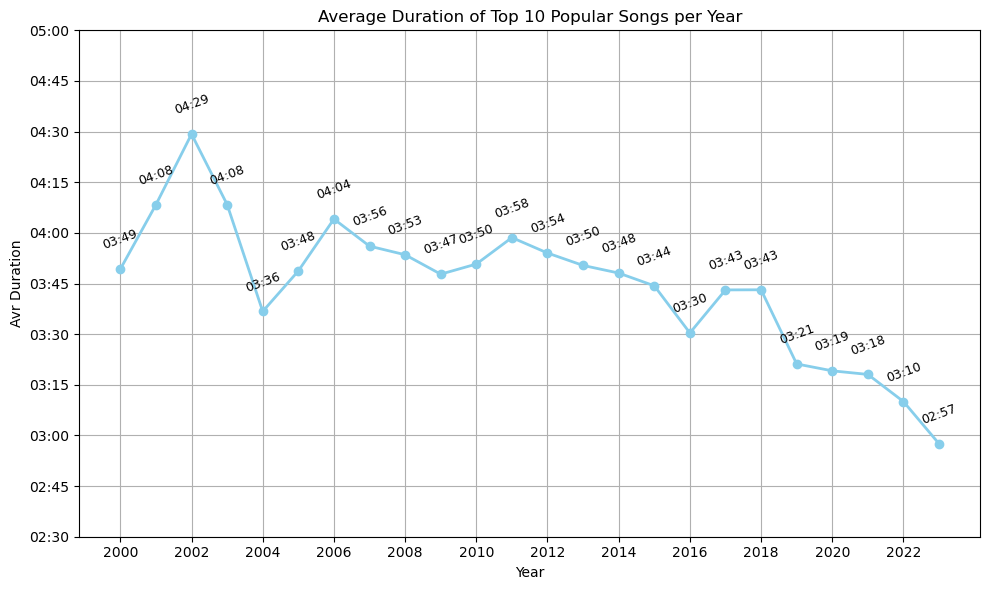

In [2]:
#################완성
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('playlist_2010to2023.xlsx', index_col='year', usecols='A:G')

# track_popularity 숫자로 변환
df['track_popularity'] = pd.to_numeric(df['track_popularity'], errors='coerce')

def ms_to_time(ms):
    m = ms // 60000  
    s = (ms % 60000) // 1000  
    return str(m).zfill(2) + ":" + str(s).zfill(2)

# 각 연도별로 track_popularity 상위 10곡의 평균 재생 시간 구하기
def calculate_top10_avg_duration(df):
    years = df.index.unique()
    top10_avg_duration = []
    for year in years:
        year_df = df.loc[year]
        # 인기 곡 10개 추출
        top10 = year_df.nlargest(10, 'track_popularity')
        # 평균
        avg_duration = top10['duration_ms'].mean()
        top10_avg_duration.append(avg_duration)
    return pd.Series(top10_avg_duration, index=years)

# 상위 10곡의 평균 duration 계산
top10_avg_duration = calculate_top10_avg_duration(df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(top10_avg_duration.index, top10_avg_duration, marker='o', color='skyblue', linewidth=2)

# 그래프 제목과 축 라벨 설정
plt.title('Average Duration of Top 10 Popular Songs per Year')
plt.xlabel('Year')
plt.ylabel('Avr Duration')

# y축 범위 설정
plt.ylim(150000, 300000)
plt.yticks(range(150000, 300001, 15000), [ms_to_time(y) for y in range(150000, 300001, 15000)])

# x축 2년 단위로 표시
years = top10_avg_duration.index
plt.xticks(years[::2])

# 격자 그리기
plt.grid(True)

# 데이터 값 표시
for i in range(len(top10_avg_duration)):
    duration = ms_to_time(int(top10_avg_duration.iloc[i]))
    plt.text(top10_avg_duration.index[i], top10_avg_duration.iloc[i] + 5000,
             duration, ha='center', va='bottom', fontsize=9, rotation=20)

# 그래프 출력
plt.tight_layout()
plt.show()